In [0]:
import pandas as pd

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter04/Dataset/openml_phpZNNasq.csv'

In [0]:
df = pd.read_csv(file_url)

In [5]:
df.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [0]:
df.drop(columns='animal', inplace=True)

In [0]:
y = df.pop('type')

In [13]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True
1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True
2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False
3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True
4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4, random_state=188)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf_model = RandomForestClassifier(random_state=42)

In [114]:
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
train_preds = rf_model.predict(X_train)

In [0]:
from sklearn.metrics import accuracy_score

In [117]:
accuracy_score(y_train, train_preds)

1.0

In [0]:
test_preds = rf_model.predict(X_test)

In [119]:
accuracy_score(y_test, test_preds)

0.8780487804878049

In [0]:
from yellowbrick.classifier import ConfusionMatrix

0.8780487804878049

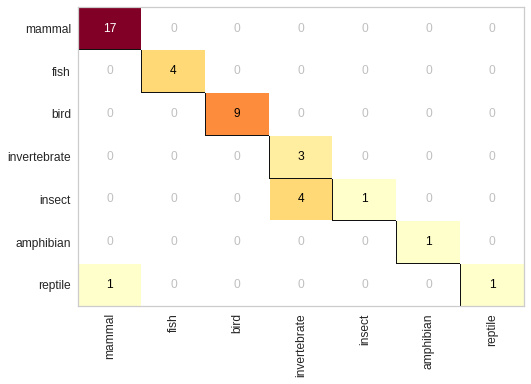

In [129]:
cm = ConfusionMatrix(rf_model, classes=y.unique())
cm.fit(X_train, y_train)
cm.score(X_test, y_test)